In [1]:
import math #operaciones matemáticas
import numpy as np #gestión numérica
import pandas as pd #estructuras de datos
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
from sklearn.model_selection import train_test_split as tts #modelar
from sklearn.linear_model import LinearRegression #regresión lineal
lr = LinearRegression()

In [4]:
datos = "1000_Empresas_mas_grandes_del_pa_s.csv"
db = pd.read_csv(datos) #we're in
db.head() #vista previa de los datos

,No.,NIT,RAZON SOCIAL,SUPERVISOR,REGIÓN,DEPARTAMENTO DOMICILIO,CIUDAD DOMICILIO,CIIU,MACROSECTOR,INGRESOS OPERACIONALES\n2018*,GANANCIA (PERDIDA) 2018,TOTAL ACTIVOS 2018,TOTAL PASIVOS 2018,TOTAL PATRIMONIO 2018,INGRESOS OPERACIONALES\n2017*,GANANCIA (PERDIDA) 2017,TOTAL ACTIVOS 2017,TOTAL PASIVOS 2017,TOTAL PATRIMONIO 2017,GRUPO EN NIIF
0,1,899999068,ECOPETROL S.A,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,B0610 - Extracción de petróleo crudo,MINERO-HIDROCARBUROS,6.257985e+10,1.155640e+10,1.137618e+11,5.654822e+10,5.721361e+10,4.968708e+10,6.620412e+09,1.075490e+11,5.965040e+10,4.789863e+10,NIIF PLENAS-GRUPO 1
1,2,830095213,ORGANIZACIÓN TERPEL S.A.,SUPERFINANCIERA,Bogotá - Cundinamarca,BOGOTA D.C.,BOGOTA-D.C.-BOGOTA D.C.,G4661 - Comercio al por mayor de combustibles ...,COMERCIO,1.487944e+10,1.337414e+08,5.488096e+09,3.525498e+09,1.962597e+09,1.249326e+10,1.952812e+08,3.863475e+09,2.186212e+09,1.677263e+09,NIIF PLENAS-GRUPO 1
2,3,900112515,REFINERIA DE CARTAGENA S.A.S.,SUPERSOCIEDADES,Costa Atlántica,BOLIVAR,CARTAGENA-BOLIVAR,C1921 - Fabricación de productos de la refinac...,MANUFACTURA,1.291943e+10,-8.024497e+08,2.788179e+10,9.121544e+09,1.876025e+10,9.150339e+09,4.809466e+07,2.677963e+10,8.612363e+09,1.816726e+10,NIIF PLENAS-GRUPO 1
3,4,890900608,ALMACENES EXITO S A,SUPERFINANCIERA,Antioquia,ANTIOQUIA,ENVIGADO-ANTIOQUIA,G4711 - Comercio al por menor en establecimien...,COMERCIO,1.144449e+10,2.794030e+08,1.566335e+10,8.013609e+09,7.649740e+09,1.125092e+10,2.177130e+08,1.596270e+10,8.123134e+09,7.839568e+09,NIIF PLENAS-GRUPO 1
4,5,890904996,EMPRESAS PÚBLICAS DE MEDELLÍN ESP,SUPERSERVICIOS,Antioquia,ANTIOQUIA,MEDELLIN-ANTIOQUIA,D3513- Dsitribución de energía electrica,SERVICIOS,8.966811e+09,2.344822e+09,4.559554e+10,2.299022e+10,2.260532e+10,7.927149e+09,2.188189e+09,3.958096e+10,1.808298e+10,2.149798e+10,NIIF PLENAS-GRUPO 1


NO HAY relaciones entre variables categóricas de esta base de datos.

In [ ]:
db.describe()

C:\Users\luisr\AppData\Local\Temp\ipykernel_21564\911649136.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(db.corr(), annot = True)


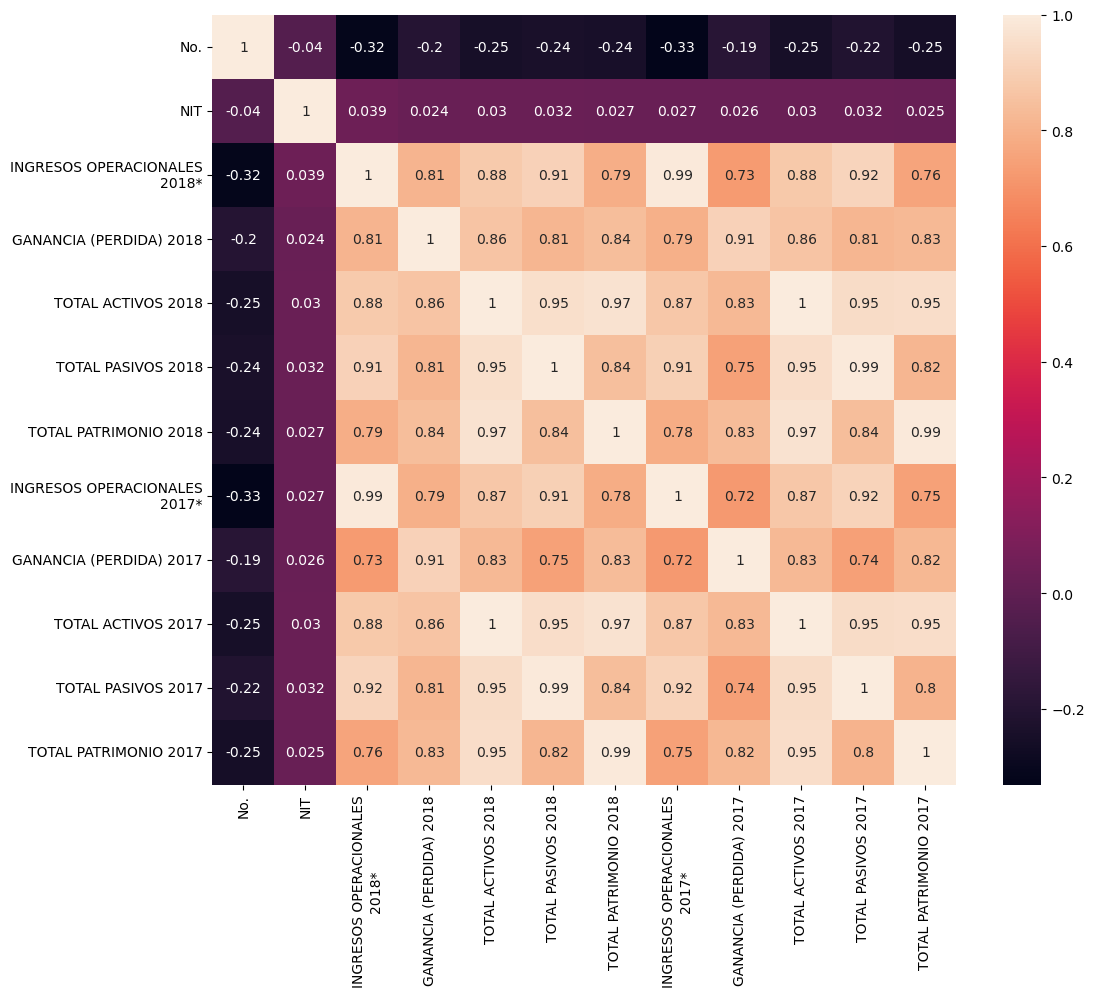

In [5]:
plt.figure(figsize=(12, 10))
sns.heatmap(db.corr(), annot = True)
plt.show()